<a href="https://colab.research.google.com/github/tago893/capstone/blob/main/Day1/EdaOnTsd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [3]:
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
data = pdr.get_data_yahoo("ETH-USD")

[*********************100%***********************]  1 of 1 completed


In [8]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...
2023-01-08,1264.181885,1287.359497,1260.226807,1287.359497,1287.359497,3495088905
2023-01-09,1287.450806,1342.144165,1286.680786,1321.538940,1321.538940,7990438824
2023-01-10,1321.395508,1342.757202,1318.527222,1336.586060,1336.586060,5830173253


# VISUALIZATION


In [9]:
import matplotlib.pyplot as plt


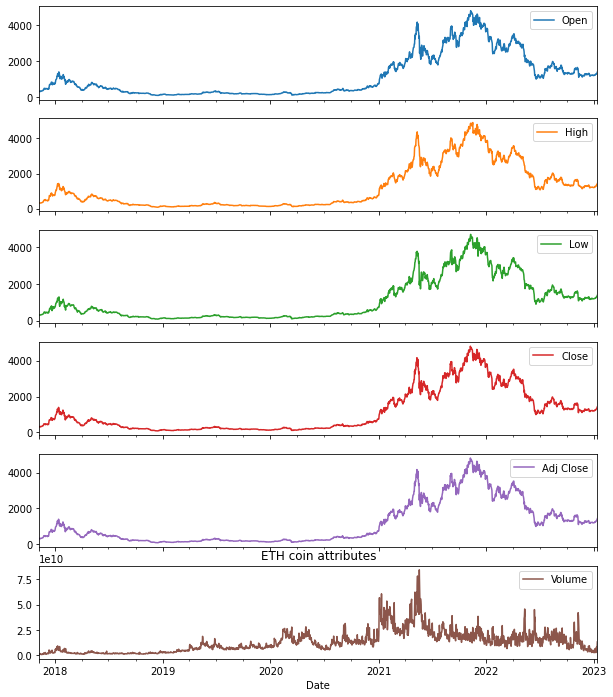

In [11]:
selected_columns = ['Open', 'High', 'Low', 'Close','Adj Close','Volume']
data[selected_columns].plot(subplots=True, figsize=(10,12))
plt.title('ETH coin attributes')
plt.show()
